In [1]:
!wget https://setup.johnsnowlabs.com/nlu/kaggle.sh -O - | bash
import nlu

--2021-05-04 06:16:29--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/3.0.1rc1/scripts/kaggle_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1567 (1.5K) [text/plain]
Saving to: ‘STDOUT’

setup Kaggle for PySpark 3.0.2 and Spark NLP 3.0.2   0  --.-KB/s               
-                   100%[===================>]   1.53K  --.-KB/s    in 0s      

2021-05-04 06:16:30 (33.5 MB/s) - written to stdout [1567/1567]

E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jre-headless_8u265-b01-0ubuntu2~18.04_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jdk-headless_8u265-b01-0ubuntu2~18.04_amd64.deb  404  Not Found [IP: 91.18

In [2]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv("/kaggle/input/covid19-tweets/covid19_tweets.csv")


In [3]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


analyze_sentiment download started this may take some time.
Approx size to download 4.9 MB
[OK!]


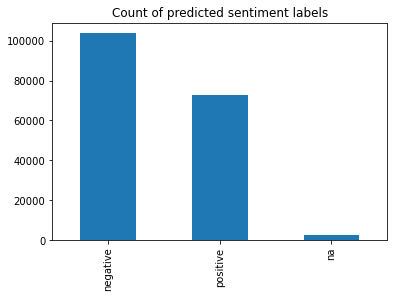

In [4]:
import nlu
sentiment_predictions = nlu.load('sentiment').predict(df,output_level='document')
sentiment_predictions['sentiment'].value_counts().plot.bar(title='Count of predicted sentiment labels')

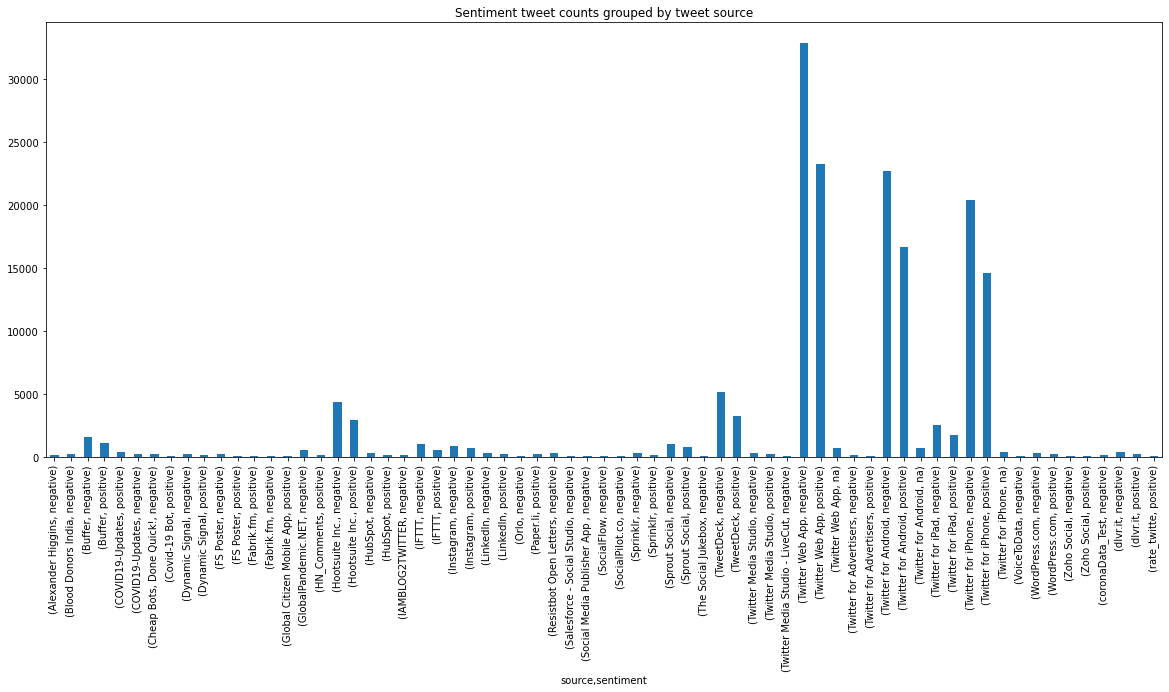

In [5]:
counts = sentiment_predictions.groupby('source')['sentiment'].value_counts()
counts[counts>100].plot.bar(figsize=(20,8), title='Sentiment tweet counts grouped by tweet source')

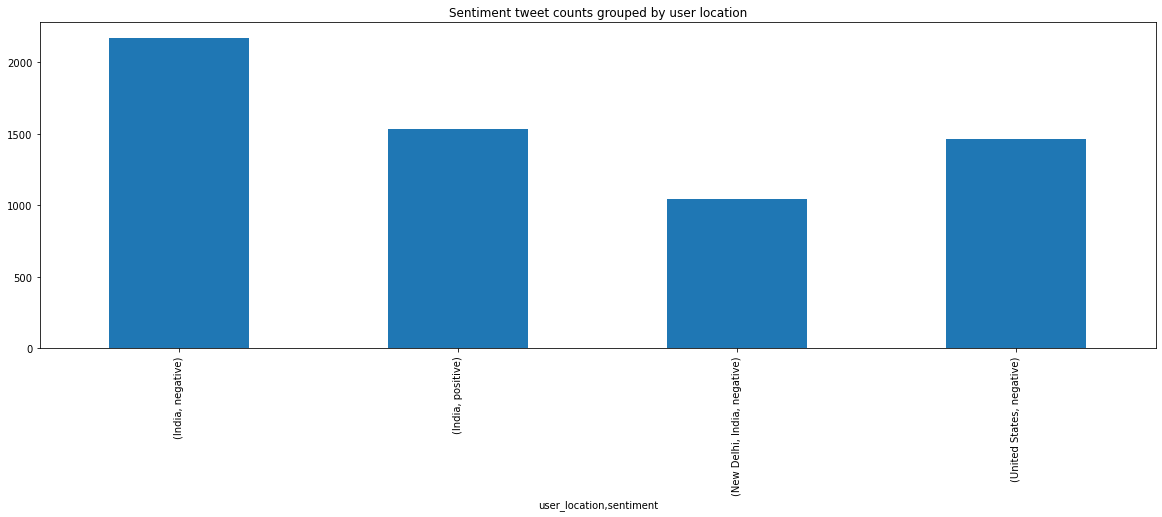

In [6]:
counts = sentiment_predictions.groupby(['user_location'])['sentiment'].value_counts()
counts[counts >1000 ].plot.bar(figsize=(20,6), title='Sentiment tweet counts grouped by user location')